# RANDOM FOREST REGRESSOR ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('RELIANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
2,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
3,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
4,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN


In [3]:
df=df.dropna()

In [4]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [5]:
df=df[["Open","High","Low","Volume","Close"]]

In [6]:
df.head()

,Open,High,Low,Volume,Close
3849,952.00,958.65,943.65,1838452,946.80
3850,936.55,954.70,936.55,2152963,951.05
3851,960.50,967.00,931.50,4368279,934.60
3852,934.65,940.80,928.15,1405741,937.75
3853,933.55,960.00,933.55,4025919,958.25


In [7]:
x = df.drop(labels='Close', axis=1)
y = df.loc[:,'Close']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  1884
NUMBER OF TEST DATASET      :  472
TOTAL NUMBER OF DATASET    :  2356


In [9]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  1884
NUMBER OF TEST DATASET      :  472
TOTAL NUMBER OF DATASET    :  2356


In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
RFC = RandomForestRegressor(random_state=42)
RFC.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [12]:
predicted = RFC.predict(x_test)

In [13]:
from sklearn.metrics import rand_score
RS = rand_score(y_test, predicted)
print("MEAN RAND SCORE OF RANDOM FOREST REGRESSOR",RS*100)

MEAN RAND SCORE OF RANDOM FOREST REGRESSOR 99.9874050883443


In [14]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predicted)
print("MEAN R2 SCOORE OF RANDOM FOREST REGRESSOR",R2*100)

MEAN R2 SCOORE OF RANDOM FOREST REGRESSOR 99.9071131449739


In [15]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predicted)
print("MEAN SQUARE ERROR OF RANDOM FOREST REGRESSOR",MSE)

MEAN SQUARE ERROR OF RANDOM FOREST REGRESSOR 82.3298137738355


In [16]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, predicted, squared=False)
print(" ROOT MEAN SQUARE ERROR OF RANDOM FOREST REGRESSOR",RMSE)

 ROOT MEAN SQUARE ERROR OF RANDOM FOREST REGRESSOR 9.073577782431553


In [17]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, predicted)
print("MEAN ABSOLUTE ERROR OF RANDOM FOREST REGRESSOR",MAE)

MEAN ABSOLUTE ERROR OF RANDOM FOREST REGRESSOR 5.978670550847463


In [18]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test, predicted)
print("EXPLAINED VARIANCE SCORE OF RANDOM FOREST REGRESSOR",EVS)

EXPLAINED VARIANCE SCORE OF RANDOM FOREST REGRESSOR 0.9990763247884991


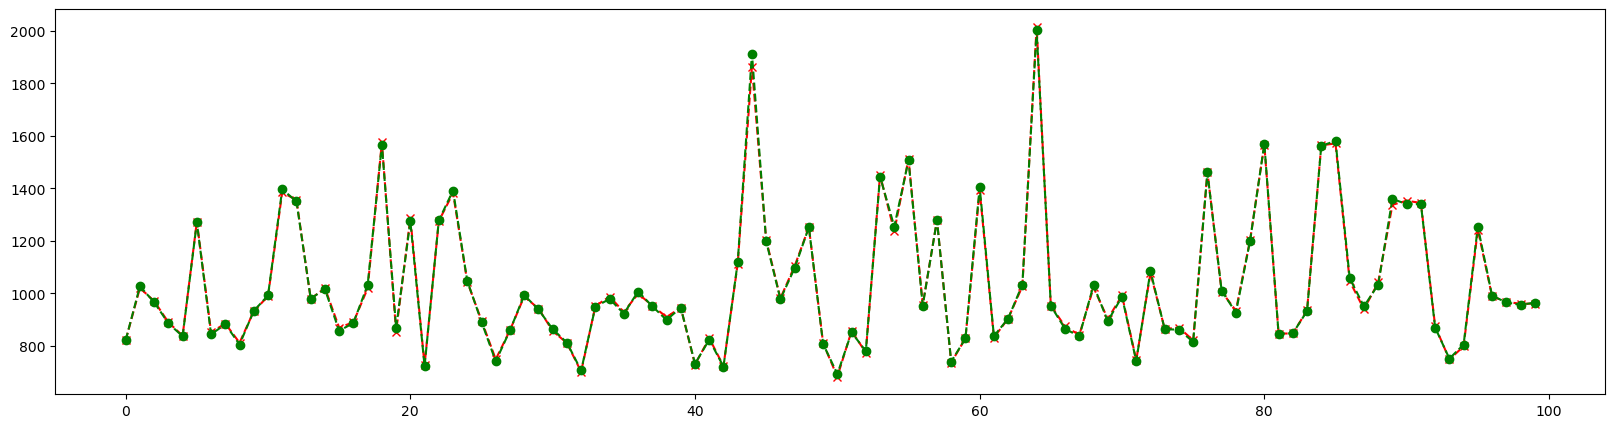

In [19]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [20]:
import joblib
joblib.dump(RFC, 'reliance1.pkl')

['reliance1.pkl']